In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 

import F16model.utils.control_metrics as utils_metrics
from ppo_control import run_sim


# plt.style.use(["science"])

### Run simulation

In [27]:
model_name = r"D:\Documents\Шарага\diser\model\F16-model-python\runs\optuna_omega_z_control\F16__1__1710300960__cd61"

init_state = np.array([0, 2500, 0, 0, 170, 0])
init_control = np.array([0, 0])
ENV_CONFIG = {
    "dt": 0.01,
    "tn": 10,
    "debug_state": False,
    "determenistic_ref": False,
    "scenario": "combo",
}
ENV_CONFIG["init_state"] = init_state
ENV_CONFIG["init_control"] = init_control


states, inside_state, actions, ref_signal, r, t = run_sim(ENV_CONFIG, model_name)

Run with seed = 494
Start state: Ox = 0 m; Oy = 2500 m; wz = 0.0 deg/s; V = 170 m/s; theta = 0.0 deg; stab_pos = 0.0 deg; dstab = 0.0 deg/s; thrust = 0.0 H %


### Plots

In [32]:
# Data manipulation
omega_z = np.degrees([i[1] for i in states])
omega_z_ref = np.degrees(ref_signal)
action_ref = np.degrees([i for i in actions])
action = np.degrees([i.stab for i in inside_state])

nmae_value = utils_metrics.nMAE(ref_signal, [i[1] for i in states])
print(f"NMAE = {nmae_value:.3f}")
print(sum(r))

RUN_TIME = datetime.now().strftime("%y-%m-%d-%H-%M-%S")
plot_name = RUN_TIME
img_fmt = "svg"

NMAE = 0.187
708.6267959282499


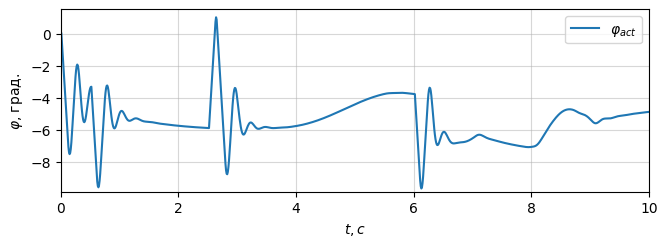

In [13]:
x_major_ticks = np.arange(round(t[0]), round(t[-1]) + 1, 1)
x_minor_ticks = np.arange(round(t[0]), round(t[-1]) + 0.5, 0.5)
y_major_ticks = np.arange(round(min(action)), round(max(action)) + 1, 1) 
y_minor_ticks = np.arange(round(min(action)), round(max(action)) + 1, 0.5) 
# Action
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(t, action, label=r"$\varphi_{act}$")
# plt.plot(t, action_ref, "--", label=r"$\varphi_{ref}$")
plt.ylabel(r"$\varphi$, град.")
plt.xlabel(r"$t, с$")
plt.legend()

# ax.set_xticks(x_major_ticks)
# ax.set_xticks(x_minor_ticks, minor=True)
# ax.set_yticks(y_major_ticks)
# ax.set_yticks(y_minor_ticks, minor=True)
plt.xlim(0, round(t[-1]))
plt.ylim(min(action)-0.2, max(action)+0.5)

ax.grid(which='minor', alpha=0.2, linestyle="--")
ax.grid(which='major', alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{nmae_value:.3f}_action.{img_fmt}")

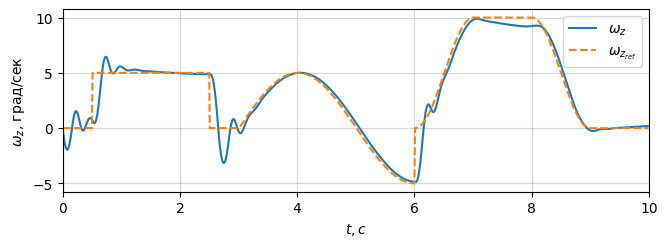

In [14]:
x_major_ticks = np.arange(round(t[0]), round(t[-1]) + 1, 1)
x_minor_ticks = np.arange(round(t[0]), round(t[-1]) + 0.5, 0.5)
y_major_ticks = np.arange(round(min(omega_z)) - 1, round(max(omega_z)) + 2, 2) 
y_minor_ticks = np.arange(round(min(omega_z)) - 1, round(max(omega_z)) + 1.5, 1.0) 
# State 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(t, omega_z, label=r"$\omega_{z}$")
plt.plot(t, omega_z_ref, "--", label=r"$\omega_{{z}_{ref}}$")
plt.ylabel(r"$\omega_{z}$, град/сек")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(t[-1]))
plt.legend()

# ax.set_xticks(x_major_ticks)
# ax.set_xticks(x_minor_ticks, minor=True)
# ax.set_yticks(y_major_ticks)
# ax.set_yticks(y_minor_ticks, minor=True)
ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{nmae_value:.3f}_omega_z.{img_fmt}")


[0.7354195158465703, 0.5546036972399829, 0.4555458885457023, 0.40326926522216966, 0.37087633147442367, 0.3514017647013119, 0.34143176622762483, 0.33939370512680256, 0.34490726022373974, 0.3586333603921559, 0.38250395932979087, 0.4204999717069168, 0.4806541535907741, 0.595667351092115, 0.7726289825301756, 1.0117149005459554, 0.7476501592753843, 0.5929734118422071, 0.4925429177587056, 0.4425619995290613, 0.41311207697033514, 0.39771185812054544, 0.3934479438918427, 0.3994786838683183, 0.41664284495804516, 0.44645072266669217, 0.4910447452510962, 0.5674882341972776, 0.6646501433710389, 0.7818187259004415, 0.9191910471944414, 1.012395445296454, 0.9119951567084257, 0.8640707811059832, 0.8552666521096519, 0.8808060573560554, 0.9413761816931151, 1.037007901587262, 0.9181483129243897, 0.8152316613391088, 0.730519599462808, 0.6629964375083466, 0.6109093252963816, 0.5727489519371893, 0.5474328253985713, 0.5341793246818568, 0.5323205576405134, 0.5411593118842227, 0.5598942098415445, 0.58758821709

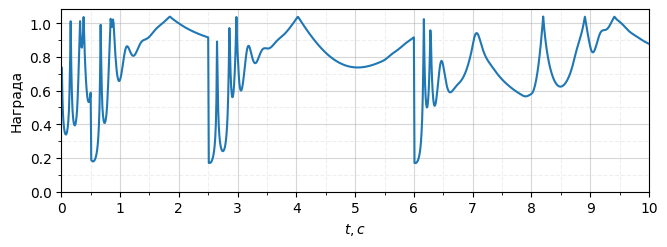

In [15]:
x_major_ticks = np.arange(round(t[0]), round(t[-1]) + 1, 1)
x_minor_ticks = np.arange(round(t[0]), round(t[-1]) + 0.5, 0.5)
y_major_ticks = np.arange(round(min(r)), round(max(r))+0.2, 0.2) 
y_minor_ticks = np.arange(round(min(r)), round(max(r))+0.1, 0.1) 
print(r)
# Reward 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(t, r)
plt.ylabel(r"Награда")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(t[-1]))

ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)
ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/{nmae_value:.3f}_reward.{img_fmt}")

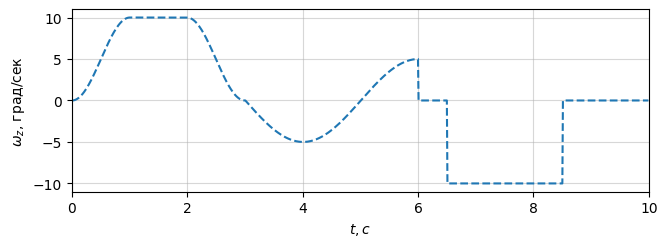

In [31]:
# Командный сигнал
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(t, omega_z_ref, "--", label=r"$\omega_{{z}_{ref}}$")
plt.ylabel(r"$\omega_{z}$, град/сек")
plt.xlabel(r"$t, с$")
plt.xlim(0, round(t[-1]))
# plt.legend()

# ax.set_xticks(x_major_ticks)
# ax.set_xticks(x_minor_ticks, minor=True)
# ax.set_yticks(y_major_ticks)
# ax.set_yticks(y_minor_ticks, minor=True)
ax.grid(which="minor", alpha=0.2, linestyle="--")
ax.grid(which="major", alpha=0.5)

plt.gcf().set_size_inches(6.5, 2.3)
plt.tight_layout(pad=0.08)
plt.savefig(f"./logs/reference_signal.{img_fmt}")